In [1]:
import torch
import torch.nn as nn
import torchvision.datasets as dset
import numpy as np
import matplotlib.pyplot as plt
import utils
from torch.utils.tensorboard import SummaryWriter
import ipywidgets as widgets
%matplotlib inline

In [2]:
model = utils.AutoEncoder(2)
loss_fn = nn.MSELoss()
writer = SummaryWriter()
model_path = "../models/autoencoder_latent_space_2.pth"
# model.load_state_dict(torch.load(model_path))

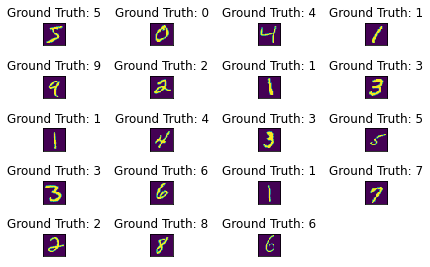

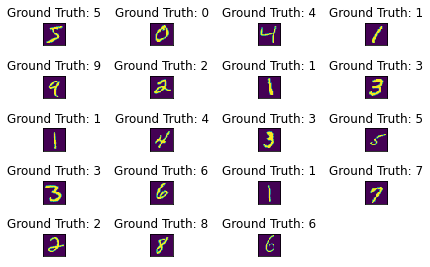

In [17]:
train_data, test_data = utils.load_mnist_dataset(1024, 32)
data = enumerate(train_data)
_, (example_data, target) = data.__next__()
fig = plt.figure()
row_num = 5
col_num = 4
for i in range(row_num * col_num - 1):
    plt.subplot(row_num,col_num,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='viridis', interpolation='none')
    plt.title(f"Ground Truth: {target[i]}")
    plt.xticks([])
    plt.yticks([])
fig

In [18]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [19]:
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
utils.train(model, train_data, optimizer, 30, device=device, writer=writer)

Error for epoch 1: 0.035718463866387384
Error for epoch 2: 0.0354998776594461
Error for epoch 3: 0.03546970994290659
Error for epoch 4: 0.03549732488848395
Error for epoch 5: 0.03542143302196163
Error for epoch 6: 0.03536752182043205
Error for epoch 7: 0.035359051394260536
Error for epoch 8: 0.035479976590407095
Error for epoch 9: 0.03561589696397215
Error for epoch 10: 0.03550090097774893
Error for epoch 11: 0.03538104847578679
Error for epoch 12: 0.03532097558096304
Error for epoch 13: 0.035303300720150185
Error for epoch 14: 0.03544504113369069
Error for epoch 15: 0.03546909034504729
Error for epoch 16: 0.035403104719974224
Error for epoch 17: 0.035674706353979596
Error for epoch 18: 0.03552351563663806
Error for epoch 19: 0.03567566103854422
Error for epoch 20: 0.035502066425347735
Error for epoch 21: 0.03546729336603213
Error for epoch 22: 0.03543009735265021
Error for epoch 23: 0.03532847736851644
Error for epoch 24: 0.03524972687838441
Error for epoch 25: 0.03517665669827138
Err

AutoEncoder(
  (encoder): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=128, bias=True)
    (2): ReLU()
    (3): Linear(in_features=128, out_features=64, bias=True)
    (4): ReLU()
    (5): Linear(in_features=64, out_features=12, bias=True)
    (6): ReLU()
    (7): Linear(in_features=12, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=12, bias=True)
    (1): ReLU()
    (2): Linear(in_features=12, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=784, bias=True)
    (7): Sigmoid()
  )
)

[]

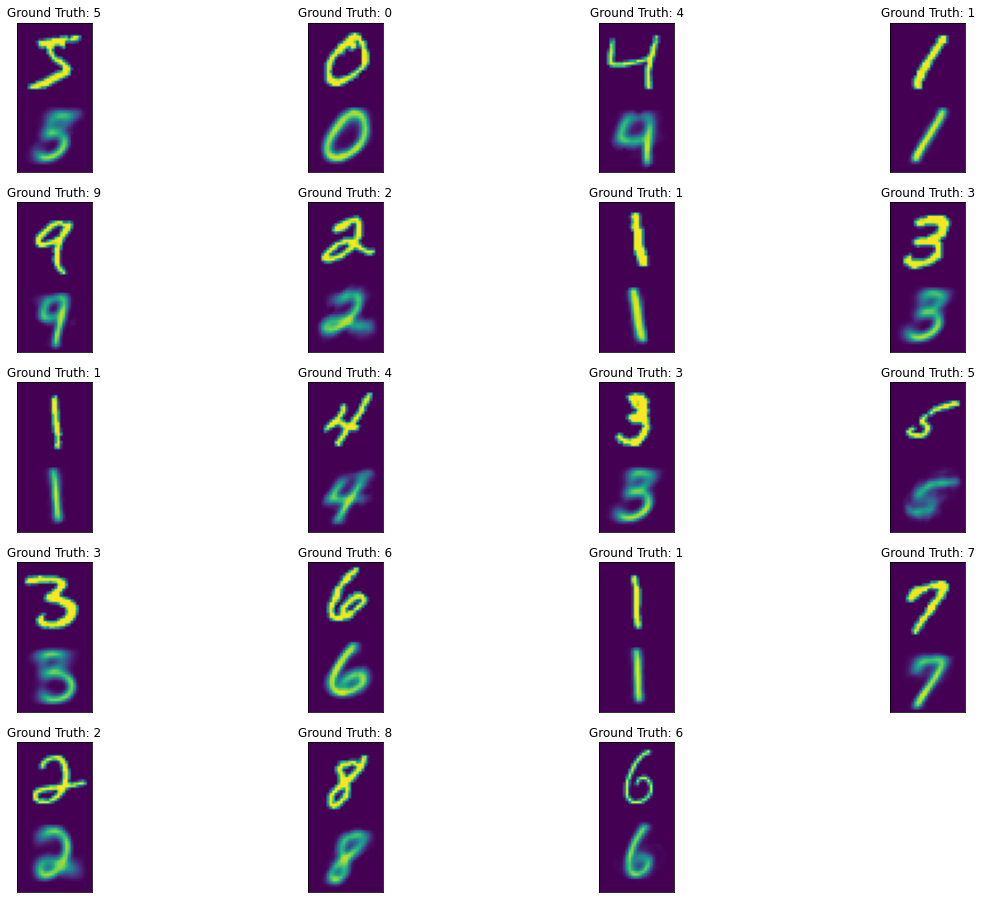

In [24]:
# plot the data
data = enumerate(train_data)
_, (batch, target) = data.__next__()
plt.figure(figsize=(20, 16))
for i in range(row_num * col_num - 1):
    plt.subplot(row_num,col_num,i+1)

    reconstructed_op = model(batch[i].unsqueeze(0).to(device)) # make the shape suitable to pass into training
    plt.imshow(torch.cat((batch[i][0].to(device), reconstructed_op[0][0])).detach().cpu().numpy())
    plt.title(f"Ground Truth: {target[i]}")
    plt.xticks([])
    plt.yticks([])
plt.plot()

In [20]:
minimum = -5
maximum = 5
@widgets.interact(x = (minimum, maximum, 0.01), y = (minimum, maximum, 0.01))
def get_image(x, y):
    plt.imshow(model.decode(torch.tensor([x, y]).unsqueeze(0).to(device))[0][0].detach().cpu().numpy())

interactive(children=(FloatSlider(value=0.0, description='x', max=5.0, min=-5.0, step=0.01), FloatSlider(value…

In [25]:

torch.save(model.state_dict(), model_path)